In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.precision',4)
pd.set_option('display.max_rows',10)

In [3]:
QTdata = pd.read_excel('DaPy_data.xlsx','QTdata',index_col=0)
QTdata.head(8)

,GDP
YQ,
2001Q1,2.330
2001Q2,2.565
2001Q3,2.687
2001Q4,3.384
2002Q1,2.536
2002Q2,2.797
2002Q3,2.972
2002Q4,3.728


<Axes: xlabel='YQ'>

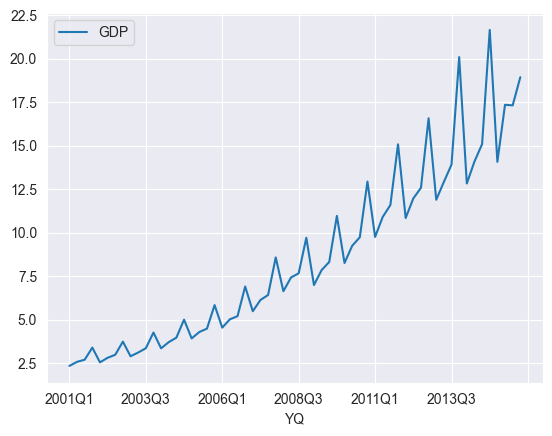

In [4]:
QTdata.plot()

In [5]:
QTdata['Year']=QTdata.index.str[:4];QTdata

,GDP,Year
YQ,,
2001Q1,2.330,2001
2001Q2,2.565,2001
2001Q3,2.687,2001
2001Q4,3.384,2001
2002Q1,2.536,2002
...,...,...
2014Q4,21.656,2014
2015Q1,14.067,2015
2015Q2,17.351,2015


In [7]:
YGDP=QTdata.groupby(['Year'])['GDP'].sum();YGDP

Year
2001    10.966
2002    12.033
2003    13.582
2004    15.988
2005    18.494
         ...  
2011    47.311
2012    51.947
2013    58.802
2014    63.646
2015    67.671
Name: GDP, Length: 15, dtype: float64

<Axes: xlabel='Year'>

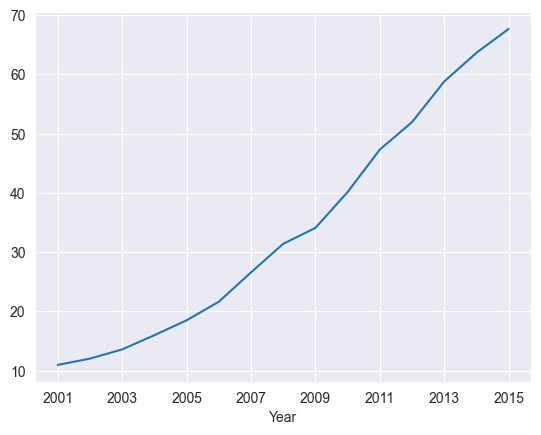

In [8]:
YGDP.plot(grid ='True')

In [9]:
YGDPds=pd.DataFrame(YGDP)
YGDPds['定基数']= YGDP- YGDP[:1].values
YGDPds

,GDP,定基数
Year,,
2001,10.966,0.000
2002,12.033,1.067
2003,13.582,2.616
2004,15.988,5.022
2005,18.494,7.528
...,...,...
2011,47.311,36.345
2012,51.947,40.981
2013,58.802,47.836


In [10]:
YGDPds['环基数']=YGDP- YGDP.shift(1);YGDPds

,GDP,定基数,环基数
Year,,,
2001,10.966,0.000,NaN
2002,12.033,1.067,1.067
2003,13.582,2.616,1.549
2004,15.988,5.022,2.406
2005,18.494,7.528,2.506
...,...,...,...
2011,47.311,36.345,7.160
2012,51.947,40.981,4.636
2013,58.802,47.836,6.855


In [12]:
QGDP=QTdata.GDP
QGDPds=pd.DataFrame({'GDP':QGDP})
QGDPds['同比数']=QGDP-QGDP.shift(4);QGDPds

,GDP,同比数
YQ,,
2001Q1,2.330,NaN
2001Q2,2.565,NaN
2001Q3,2.687,NaN
2001Q4,3.384,NaN
2002Q1,2.536,0.206
...,...,...
2014Q4,21.656,1.564
2015Q1,14.067,1.246
2015Q2,17.351,3.268


In [13]:
YGDPds['定基比']=YGDP/YGDP[:1].values;YGDPds

,GDP,定基数,环基数,定基比
Year,,,,
2001,10.966,0.000,NaN,1.0000
2002,12.033,1.067,1.067,1.0973
2003,13.582,2.616,1.549,1.2386
2004,15.988,5.022,2.406,1.4580
2005,18.494,7.528,2.506,1.6865
...,...,...,...,...
2011,47.311,36.345,7.160,4.3143
2012,51.947,40.981,4.636,4.7371
2013,58.802,47.836,6.855,5.3622


In [14]:
QGDPds['同基比']=(QGDP/QGDP.shift(4)-1)*100;QGDPds

,GDP,同比数,同基比
YQ,,,
2001Q1,2.330,NaN,NaN
2001Q2,2.565,NaN,NaN
2001Q3,2.687,NaN,NaN
2001Q4,3.384,NaN,NaN
2002Q1,2.536,0.206,8.8412
...,...,...,...
2014Q4,21.656,1.564,7.7842
2015Q1,14.067,1.246,9.7184
2015Q2,17.351,3.268,23.2053


In [30]:
n=1/len(YGDP)
ADR=(YGDP[-1:].values/YGDP[:1].values)**n
print(f'\n\t平均增长量 ={ADR.item():5.3f}%')


	平均增长量 =1.129%
